In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import missingno as msno
from IPython.display import display
from sklearn.preprocessing import OrdinalEncoder
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [6]:
train=pd.read_csv('dataset/train.csv')
train[['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size']]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0
...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0


In [4]:
import sys
!{sys.executable} -m pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


In [7]:
test =pd.read_csv('dataset/test.csv')
test[['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size']]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0
...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0


In [ ]:
features = ['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size']
data = pd.concat([train[features] ,test[features]],ignore_index=True)

# Print the first 5 rows of 'customer' DataFrame
data.sample(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
3437,466645,Male,Yes,66,Yes,Lawyer,5.0,Low,2.0
9466,463703,Male,Yes,69,No,Executive,1.0,High,4.0
2617,466309,Male,No,21,No,Healthcare,1.0,Low,4.0
2109,464318,Male,Yes,88,Yes,Executive,1.0,Low,1.0
7243,464183,Female,No,37,No,Artist,4.0,Low,2.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 752.1+ KB


In [ ]:
data.isna().sum()


ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
dtype: int64

In [11]:
data.fillna(method='ffill',inplace=True)


In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  object 
 1   Ever_Married     10695 non-null  object 
 2   Age              10695 non-null  int64  
 3   Graduated        10695 non-null  object 
 4   Profession       10695 non-null  object 
 5   Work_Experience  10695 non-null  float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10695 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 668.6+ KB


---------------------------------------------------------------------------------------------------------------------------
Gender
Male      5841
Female    4854
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


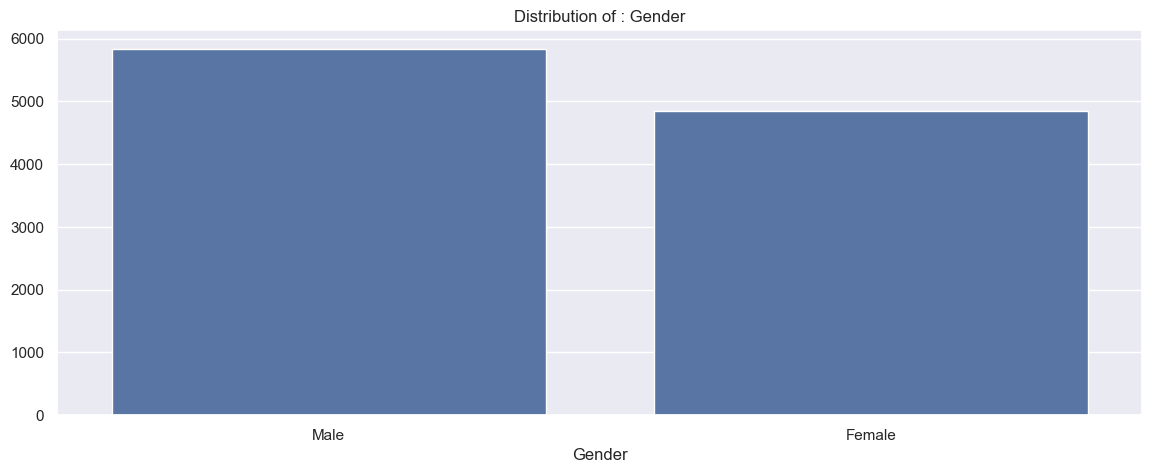

---------------------------------------------------------------------------------------------------------------------------
Ever_Married
Yes    6268
No     4427
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


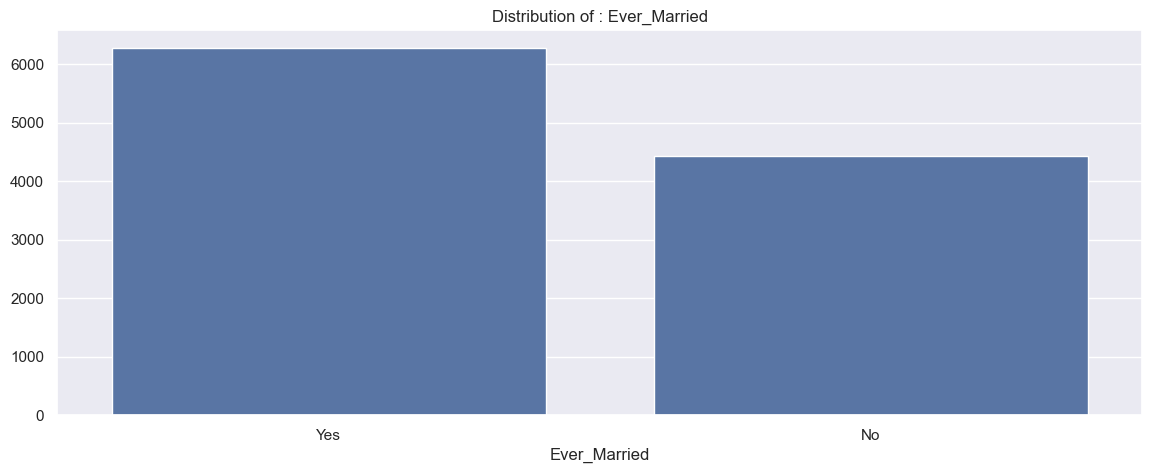

---------------------------------------------------------------------------------------------------------------------------
Age
35    321
42    320
37    304
43    301
40    300
     ... 
75     37
76     36
78     36
80     33
85     32
Name: count, Length: 67, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


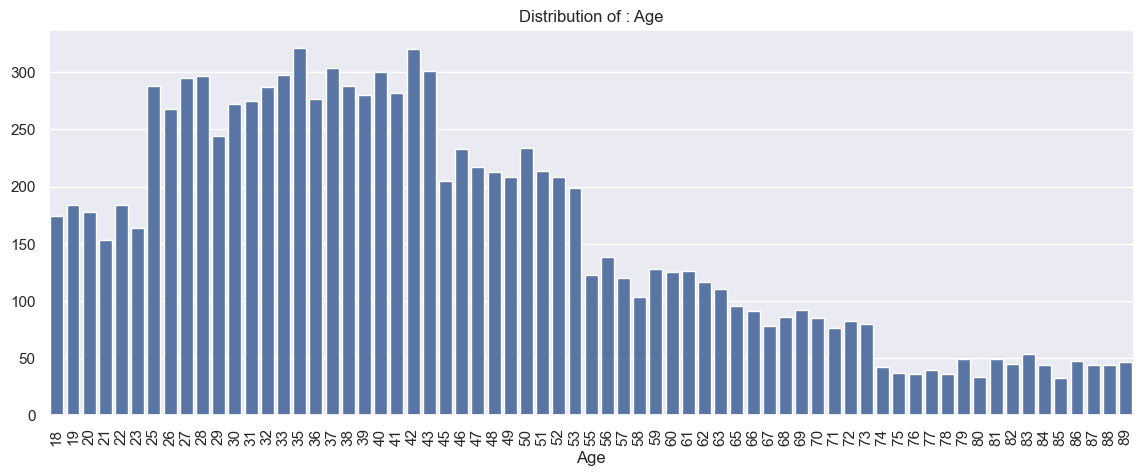

---------------------------------------------------------------------------------------------------------------------------
Graduated
Yes    6641
No     4054
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


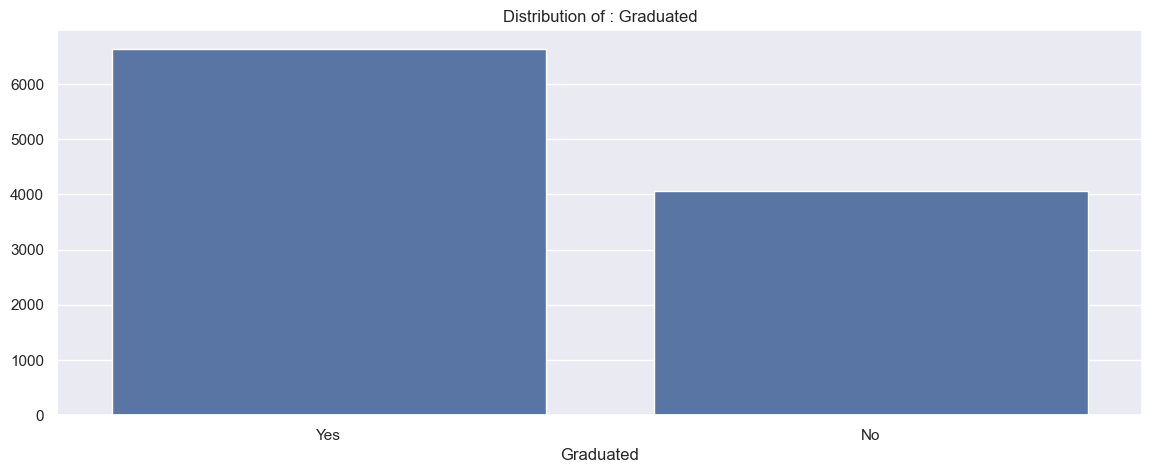

---------------------------------------------------------------------------------------------------------------------------
Profession
Artist           3363
Healthcare       1779
Entertainment    1268
Doctor            953
Engineer          942
Lawyer            859
Executive         783
Marketing         412
Homemaker         336
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


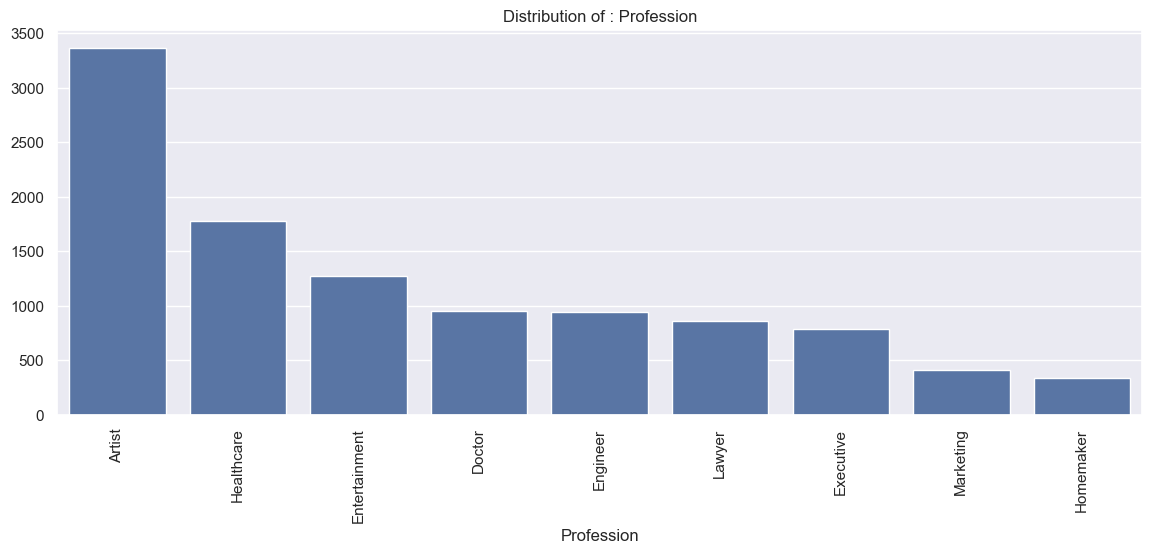

---------------------------------------------------------------------------------------------------------------------------
Work_Experience
1.0     3478
0.0     3455
8.0      686
9.0      677
2.0      417
4.0      380
3.0      379
6.0      301
5.0      294
7.0      286
14.0      77
11.0      74
10.0      69
12.0      62
13.0      60
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


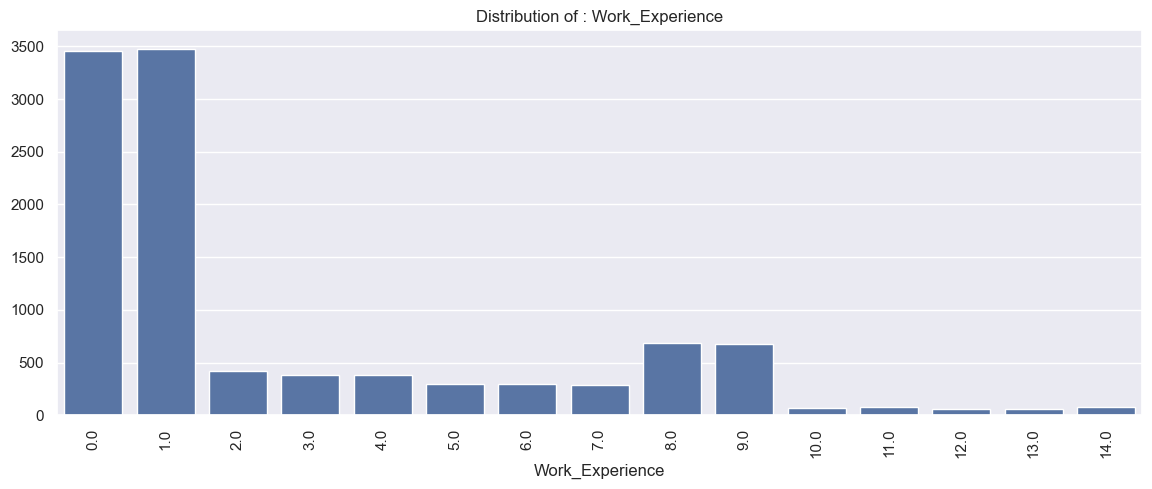

---------------------------------------------------------------------------------------------------------------------------
Spending_Score
Low        6494
Average    2599
High       1602
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


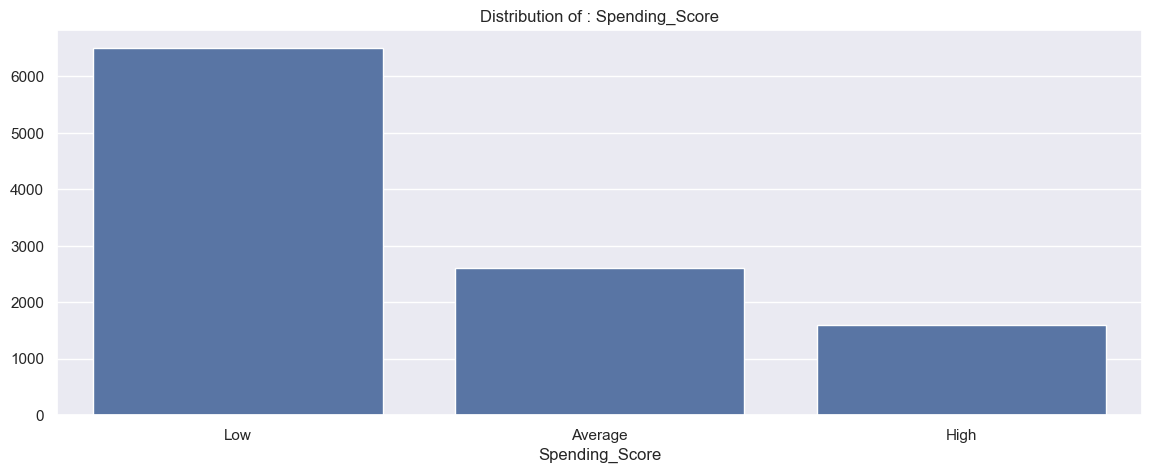

---------------------------------------------------------------------------------------------------------------------------
Family_Size
2.0    3288
1.0    2065
3.0    2032
4.0    1901
5.0     846
6.0     301
7.0     131
9.0      66
8.0      65
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------


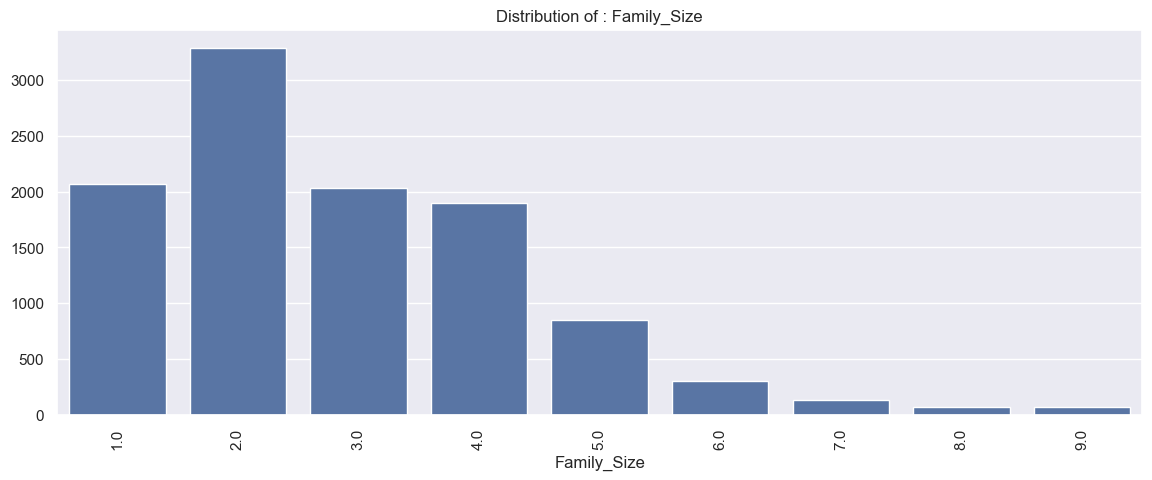

In [17]:
# Plotting the all Columns using a for loop
for col in data.columns:
    # Display value counts
    print('---------------------------------------------------------------------------------------------------------------------------')
    print(data[col].value_counts())
    print('----------------------------------------------------------------------------------------------------------------------------')

    # Create barplot with title using string concatenation
    plt.figure(figsize=(14, 5))
    sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts().values)  # Separate x and y arguments
    plt.title('Distribution of : ' + col)  # Concatenate string for title
    if len(data[col].value_counts()) >= 9:
        plt.xticks(rotation=90)
    plt.show()


In [19]:
# Encoding ordinal data for numerical analysis
OE = OrdinalEncoder(dtype=object)
encoded_data = pd.DataFrame(OE.fit_transform(data),columns = data.columns)

In [20]:
encoded_data.head()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,4,0,5,1,2,3
1,0,1,18,1,2,1,0,2
2,0,1,44,1,2,1,2,0
3,1,1,44,1,7,0,1,1
4,0,1,20,1,3,0,1,5


In [23]:
# Standardize featuress across the data
standardscaler = StandardScaler()
scaled_data = standardscaler.fit_transform(encoded_data)

In [24]:
scaled_data


array([[ 0.91160413, -1.189898  , -1.25146663, ..., -0.47601426,
         0.75057469,  0.75099591],
       [-1.09696739,  0.84040817, -0.33671597, ..., -0.47601426,
        -1.61042423,  0.101796  ],
       [-1.09696739,  0.84040817,  1.36210668, ..., -0.47601426,
         0.75057469, -1.19660381],
       ...,
       [-1.09696739, -1.189898  ,  0.57803469, ..., -0.47601426,
         0.75057469, -0.5474039 ],
       [ 0.91160413,  0.84040817,  0.18599869, ..., -0.47601426,
        -0.42992477,  1.40019581],
       [-1.09696739, -1.189898  , -0.01001931, ...,  1.88652301,
         0.75057469,  0.101796  ]])

In [25]:
inertia = []

for i in range(1,11):
    kmean = KMeans(n_clusters=i).fit(scaled_data)
    inertia.append(kmean.inertia_)
inertia

[85559.99999999975,
 66404.9305124722,
 59145.742293855044,
 54423.025766618935,
 47146.8976968607,
 44463.2051541561,
 41757.84881536311,
 39130.7716734134,
 37440.78396184696,
 36377.21603194649]

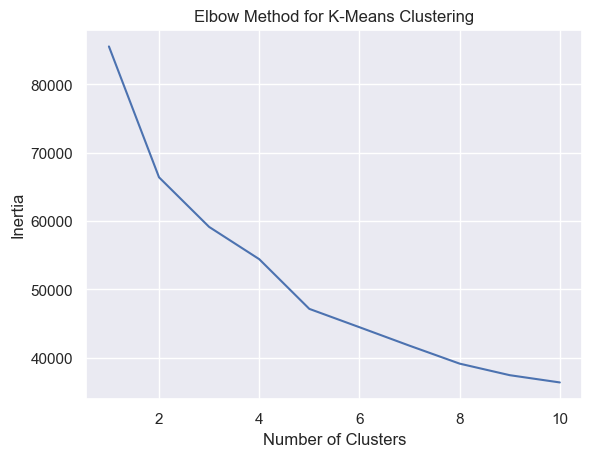

In [26]:
sns.lineplot(x=range(1, 11), y=inertia, markers='o')  

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means Clustering')
plt.grid(True)
plt.show()


In [27]:
# Assign cluster labels to data using KMeans (n_clusters=4)

kmean=KMeans(n_clusters=4).fit(scaled_data)
kmean.labels_

array([0, 1, 2, ..., 3, 1, 3], dtype=int32)

In [28]:
segmented_data = encoded_data.copy()
segmented_data['cluster'] = kmean.labels_
segmented_data


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster
0,1,0,4,0,5,1,2,3,0
1,0,1,18,1,2,1,0,2,1
2,0,1,44,1,2,1,2,0,2
3,1,1,44,1,7,0,1,1,2
4,0,1,20,1,3,0,1,5,1
...,...,...,...,...,...,...,...,...,...
10690,1,0,10,0,5,9,2,3,0
10691,0,0,15,1,1,1,2,0,3
10692,0,0,32,1,3,1,2,1,3
10693,1,1,26,1,4,1,1,4,1


In [29]:
segmented_data['cluster'].value_counts()


cluster
1    3317
3    3072
0    2732
2    1574
Name: count, dtype: int64